In [1]:
from resqu import data
from resqu import FlightSet
import resqu.make_dataset as md

import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", None)

In [2]:
set = 'train'
preproc_dir = data.data_dir / f"flights_{set}_preproc_v0"
fids = [f.stem for f in preproc_dir.glob("*.parquet")]
flight_set = FlightSet[set.upper()]
agg_funcs = ["mean", "std", "min", "max"]
split_funcs = ["mean", "std"]
split_feat = ["vertical_rate"]
split = 9

In [ ]:
df = md.make_lgbm_dataset(
    in_dir=preproc_dir,
    flight_set=flight_set,
    agg_funcs=agg_funcs,
    split_funcs=split_funcs,
    split_feat=split_feat,
    split=split,
)

Processing flights:   0%|          | 0/11037 [00:00<?, ?it/s]

In [9]:
df.to_parquet(data.lgbm_data_dir / "df_rank_v0_split_test.parquet")

In [9]:
# process_flight_agg(fid, preproc_dir, flight_set, split_feat=['vertical_rate'], split=2)
result = md.run_proc(
    process_func=md.process_flight_agg,
    in_dir=preproc_dir,
    flight_set=flight_set,
    agg_funcs=["mean", "std", "min", "max"],
)

df_agg = (
    pd.concat(result)
    .sort_values(by="idx")
    .reset_index(drop=True)
    .merge(
        data.ac_tows.drop(labels=["min_tow_ch_set", "max_tow_ch_set"], axis=1),
        on="aircraft_type",
        how="left",
    )
)

Processing flights:   0%|          | 0/11037 [00:00<?, ?it/s]

In [3]:
result_split = md.run_proc(
    process_func=md.process_flight_split,
    in_dir=preproc_dir,
    flight_set=FlightSet.TRAIN,
    split_feat=["vertical_rate"],
    split=9,
)
df_split = pd.concat(result_split).sort_values(by="idx").reset_index(drop=True)

Processing flights:   0%|          | 0/11037 [00:00<?, ?it/s]

In [4]:
df_split_faz = pd.read_parquet(data.data_dir / "fuel_train_with_alt_10parts.parquet")
df_split_faz.isna().sum()

idx                        0
flight_id                  0
start                      0
end                        0
fuel_kg                    0
vrate_part_1_mean       3305
vrate_part_1_std        3305
vrate_part_2_mean       3624
vrate_part_2_std        3624
vrate_part_3_mean       3634
vrate_part_3_std        3634
vrate_part_4_mean       3650
vrate_part_4_std        3650
vrate_part_5_mean       3656
vrate_part_5_std        3656
vrate_part_6_mean       3646
vrate_part_6_std        3646
vrate_part_7_mean       3646
vrate_part_7_std        3646
vrate_part_8_mean       3651
vrate_part_8_std        3651
vrate_part_9_mean       3653
vrate_part_9_std        3653
vrate_part_10_mean      3579
vrate_part_10_std       3579
alt_part_duration       2975
alt_part_1_mean       131530
alt_part_1_std        131530
alt_part_2_mean       131530
alt_part_2_std        131530
alt_part_3_mean       131530
alt_part_3_std        131530
alt_part_4_mean       131530
alt_part_4_std        131530
alt_part_5_mea

In [ ]:
mask = df_split_faz.idx.isin(df_split.idx)
idx_miss = df_split_faz[~mask].idx

In [12]:
df_split_faz[~mask]

,idx,flight_id,start,end,fuel_kg,vrate_part_1_mean,vrate_part_1_std,vrate_part_2_mean,vrate_part_2_std,vrate_part_3_mean,vrate_part_3_std,vrate_part_4_mean,vrate_part_4_std,vrate_part_5_mean,vrate_part_5_std,vrate_part_6_mean,vrate_part_6_std,vrate_part_7_mean,vrate_part_7_std,vrate_part_8_mean,vrate_part_8_std,vrate_part_9_mean,vrate_part_9_std,vrate_part_10_mean,vrate_part_10_std,alt_part_duration,alt_part_1_mean,alt_part_1_std,alt_part_2_mean,alt_part_2_std,alt_part_3_mean,alt_part_3_std,alt_part_4_mean,alt_part_4_std,alt_part_5_mean,alt_part_5_std,alt_part_6_mean,alt_part_6_std,alt_part_7_mean,alt_part_7_std,alt_part_8_mean,alt_part_8_std,alt_part_9_mean,alt_part_9_std,alt_part_10_mean,alt_part_10_std
80,80,prc770860078,2025-04-12 22:22:41.649000+00:00,2025-04-12 22:36:26.290000+00:00,3175.1440,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81,81,prc770860078,2025-04-12 22:36:26.290000+00:00,2025-04-12 23:32:23.456000+00:00,2721.5520,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100,100,prc770867379,2025-04-12 22:34:18.244000+00:00,2025-04-12 22:36:53.261000+00:00,136.0776,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101,101,prc770867379,2025-04-12 22:40:23.264000+00:00,2025-04-12 22:43:33.252000+00:00,45.3592,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
102,102,prc770867379,2025-04-12 22:45:38.179000+00:00,2025-04-12 22:47:28.272000+00:00,136.0776,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131223,131223,prc801828029,2025-08-13 12:39:28.886000+00:00,2025-08-13 12:40:58.134000+00:00,181.4368,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131224,131224,prc801828029,2025-08-13 12:40:58.134000+00:00,2025-08-13 12:41:20.758000+00:00,136.0776,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131295,131295,prc801831761,2025-08-13 13:11:41.297000+00:00,2025-08-13 13:13:45.717000+00:00,45.3592,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131296,131296,prc801831761,2025-08-13 13:14:28.649000+00:00,2025-08-13 13:23:04.002000+00:00,272.1552,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
fid = 'prc770860078'

result, df_orig = process_flight_split(fid, preproc_dir, FlightSet.TRAIN, split_feat=split_feat, split=split)
result

79
80
81


,idx,vertical_rate_mean_0,vertical_rate_mean_1,vertical_rate_mean_2,vertical_rate_mean_3,vertical_rate_mean_4,vertical_rate_mean_5,vertical_rate_mean_6,vertical_rate_mean_7,vertical_rate_mean_8,vertical_rate_mean_9,vertical_rate_std_0,vertical_rate_std_1,vertical_rate_std_2,vertical_rate_std_3,vertical_rate_std_4,vertical_rate_std_5,vertical_rate_std_6,vertical_rate_std_7,vertical_rate_std_8,vertical_rate_std_9
0,79,-930.461538,-800.0,-866.461538,-832.0,-832.0,-827.428571,-871.384615,-871.384615,-790.857143,-573.538462,160.245965,33.207969,33.207969,0.0,0.0,17.104719,49.148649,32.40766,95.941374,133.521918


In [25]:
df_orig[df_orig.idx == 80]

,timestamp,flight_id,typecode,latitude,longitude,altitude,groundspeed,track,vertical_rate,mach,TAS,CAS,source,phase,ts,cumdist,distance_km,tow_est_kg,ff_kgs_est,mass_est,idx,split


(<Figure size 1800x1000 with 6 Axes>,
 array([[<Axes: title={'center': 'altitude'}>,
         <Axes: title={'center': 'latitude'}>,
         <Axes: title={'center': 'longitude'}>],
        [<Axes: title={'center': 'vertical_rate'}>,
         <Axes: title={'center': 'speed'}>,
         <Axes: title={'center': 'track'}>]], dtype=object))

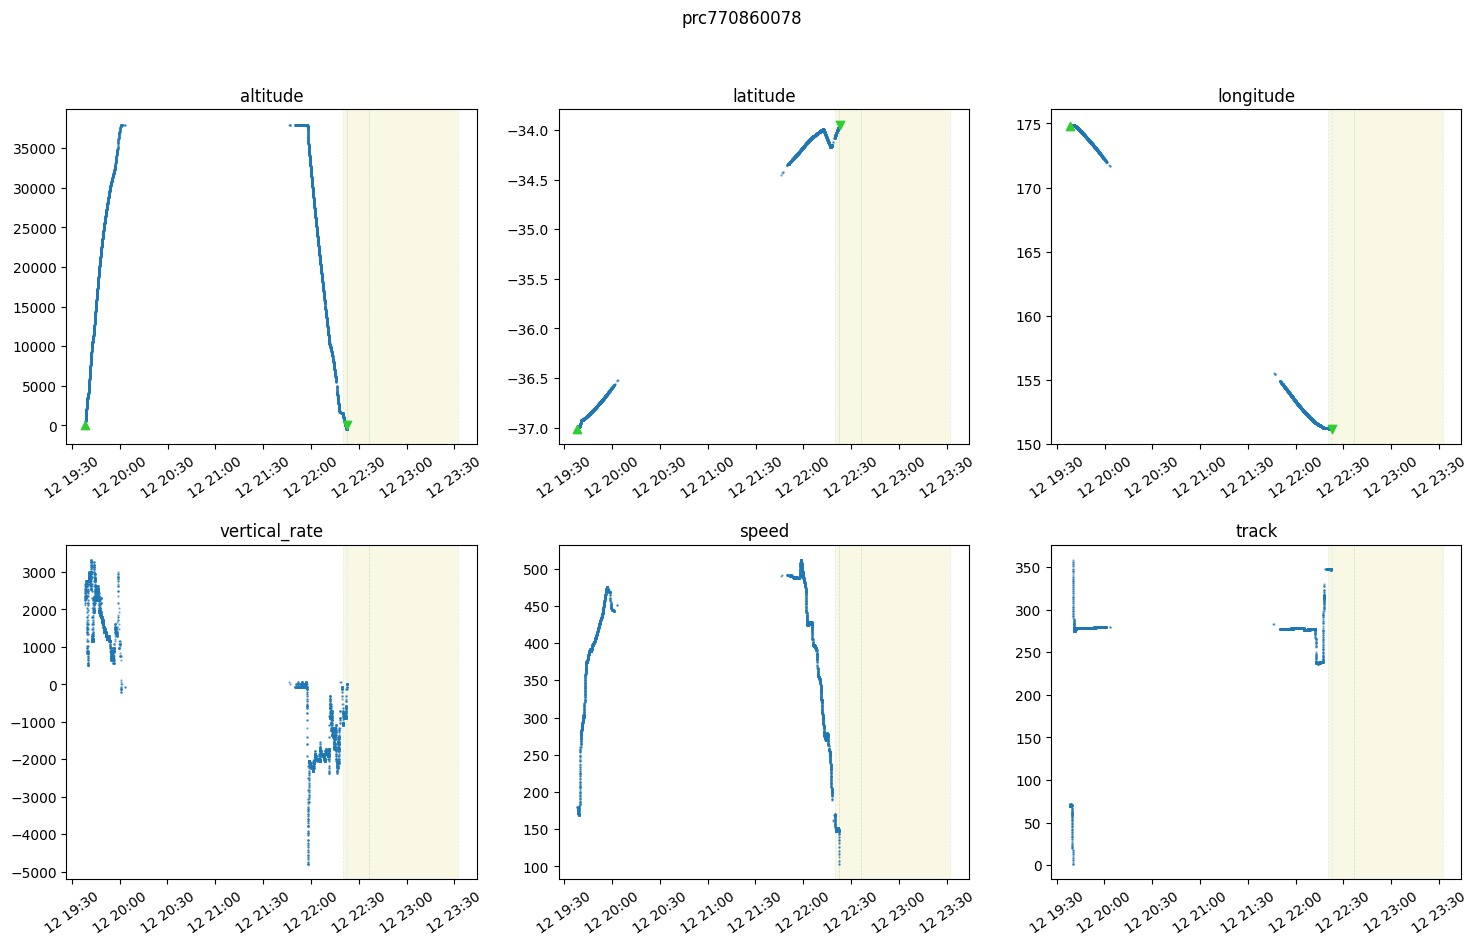

In [26]:
from resqu import plotter
plotter.vis_train_flight(fid)

In [18]:
data.get_fuel_id(fid)

,idx,flight_id,start,end,fuel_kg,seg_duration,ff_kgs
79,79,prc770860078,2025-04-12 22:20:05.562,2025-04-12 22:22:19.791,453.592,134.229,3.379240
80,80,prc770860078,2025-04-12 22:22:41.649,2025-04-12 22:36:26.290,3175.144,824.641,3.850335
81,81,prc770860078,2025-04-12 22:36:26.290,2025-04-12 23:32:23.456,2721.552,3357.166,0.810669
